<h2 align="center"> Gradient Descent </h2>

---
**Referece Links**
* **Assumptions in Regression -** https://www.analyticsvidhya.com/blog/2016/07/deeper-regression-analysis-assumptions-plots-solutions/?utm_source=courses&utm_medium=introduction_to_regression

* **Introduction to partial derivatives -** https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/partial-derivative-and-gradient-articles/a/introduction-to-partial-derivatives
---

### Task 1: Load the Libraries
---

In [1]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

### Task 2: Load the Data
---

In [3]:
data=pd.read_csv('datasets/bike_sharing_data.txt')
data

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


### Task 3: Visualize the Data
---

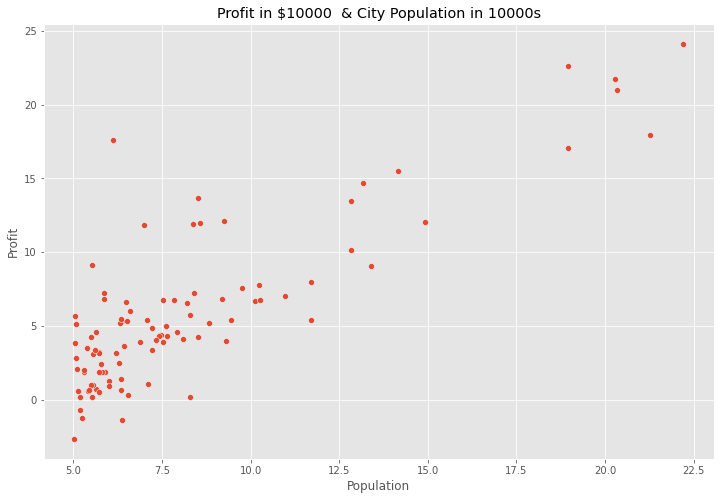

In [5]:
ax=sns.scatterplot(x='Population',y='Profit',data=data)
ax.set_title("Profit in $10000  & City Population in 10000s");

### Task 4: Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [6]:
def cost_function (X,y,theta):
    m=len(y)
    y_pred=X.dot(theta)
    error=(y_pred-y)**2
    return 1/(2 * m)*np.sum(error)

In [7]:
data['Interecept']=1
data

,Population,Profit,Interecept
0,6.1101,17.59200,1
1,5.5277,9.13020,1
2,8.5186,13.66200,1
3,7.0032,11.85400,1
4,5.8598,6.82330,1
...,...,...,...
92,5.8707,7.20290,1
93,5.3054,1.98690,1
94,8.2934,0.14454,1
95,13.3940,9.05510,1


In [8]:
m=data.Population.values.size
X=data.drop('Profit',axis=1).values
y=data.Profit.values
theta=np.zeros(2)

In [9]:
theta

array([0., 0.])

In [10]:
cost_function(X,y,theta)

32.072733877455676

### Task 5: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [ ]:
#     iterations=1
#     alpha=0.01
#     m=len(y)
#     costs=[]
#     for i in range(iterations):
#         y_pred=X.dot(theta)
#         print(y_pred)
#         error=np.dot(X.transpose(),(y_pred-y))
        
#         theta=theta- alpha*(1/m) * error
#         costs.append(cost_function(X,y,theta))

In [ ]:
# np.dot(X.transpose(),(y_pred-y))

In [11]:
def gradient_descent(X,y,theta,alpha,iterations):
    m=len(y)
    costs=[]
    for i in range(iterations):
        y_pred=X.dot(theta)
        error=np.dot(X.transpose(),(y_pred-y))
        theta=theta- alpha*(1/m) * error
        costs.append(cost_function(X,y,theta))
    return theta,costs

In [12]:
theta,costs=gradient_descent(X,y,theta,alpha=0.01,iterations=2000)

In [13]:
theta

array([ 1.18221277, -3.78806857])

In [14]:
print("h(x)={} + {}X".format(str(round(theta[0],2)),str(round(theta[1],2))))

h(x)=1.18 + -3.79X


### Task 6: Visualising the Cost Function $J(\theta)$
---

In [15]:
from mpl_toolkits.mplot3d import Axes3D

In [16]:
theta_0=np.linspace(-5,5,100)
theta_1=np.linspace(-10,10,100)
cost_values=np.zeros(len(theta_0)*len(theta_1)).reshape(len(theta_0),len(theta_1))

In [17]:
for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t=np.array([theta_0[i],theta_1[j]])
        cost_values[i,j]=cost_function(X,y,t)

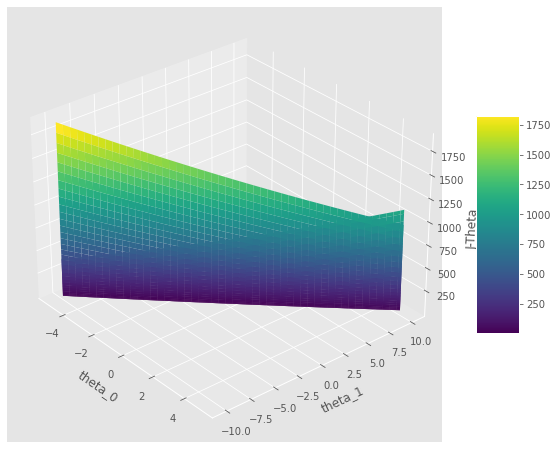

In [18]:
fig=plt.figure(figsize=(12,8))
ax=fig.gca(projection='3d')

surf=ax.plot_surface(theta_0,theta_1,cost_values,cmap='viridis')

fig.colorbar(surf, shrink=0.5,aspect=5)

plt.xlabel("theta_0")
plt.ylabel("theta_1")

ax.set_zlabel("J-Theta")

ax.view_init(30,320)

plt.show();

### Task 7: Plotting the Convergence
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

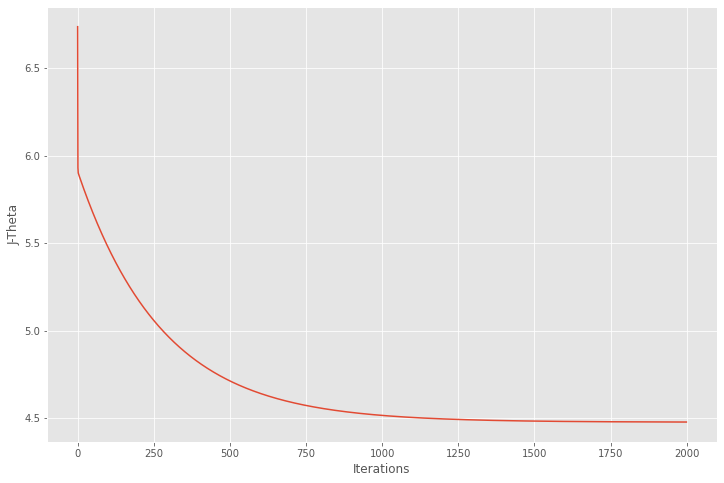

In [19]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("J-Theta")
plt.show();

In [20]:
import numpy as np

In [21]:
-np.log(.9)

0.10536051565782628

In [23]:
-np.log(.2)

1.6094379124341003

In [24]:
-np.log(.15)

1.8971199848858813

In [25]:
-np.log(.95)

0.05129329438755058